In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *

In [3]:
from PIL import Image

In [4]:
im = Image.open('/kaggle/input/100-bird-species/train/ABBOTTS BABBLER/001.jpg')

In [5]:
im.size

(224, 224)

In [6]:
# dir(Image.open)

In [7]:
birds = DataBlock(
                    blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    # splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=Resize(200),
                    batch_tfms = aug_transforms(size=128, min_scale=0.75)
)


In [8]:
from pathlib import Path

In [9]:
path = Path("/kaggle/input/100-bird-species")

In [10]:
dls = birds.dataloaders(path)

In [11]:
learn18 = vision_learner(dls, resnet18, metrics=error_rate) # cnn_learner(dls, resnet18, metrics=accuracy) # You can try resnet34, resnet50 also

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 50.5MB/s]


In [12]:
len(dls.vocab)

526

In [13]:
dls.vocab

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

SuggestedLRs(valley=0.001737800776027143)

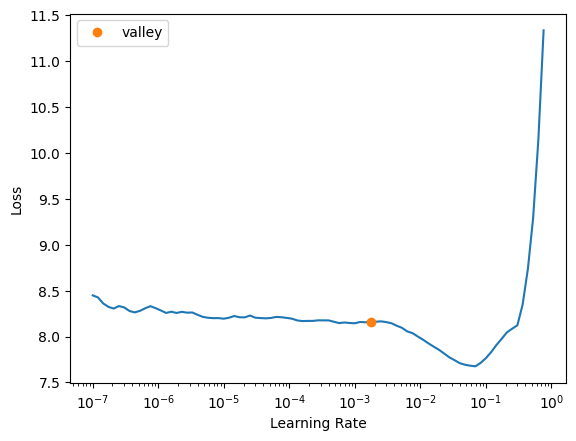

In [14]:
learn18.lr_find()

In [15]:
learn18.fine_tune(5, 3*.0003)

epoch,train_loss,valid_loss,error_rate,time
0,2.871176,1.852014,0.409523,03:37


epoch,train_loss,valid_loss,error_rate,time
0,1.678351,1.068574,0.243088,02:42
1,1.113865,0.699643,0.172832,02:41
2,0.847768,0.557515,0.137898,02:42
3,0.654162,0.494269,0.125382,02:43
4,0.565569,0.481378,0.120265,02:42


In [16]:
learn18.predict('/kaggle/input/100-bird-species/test/ABBOTTS BABBLER/1.jpg')[0]

'ABBOTTS BABBLER'

In [17]:
learn18.export()

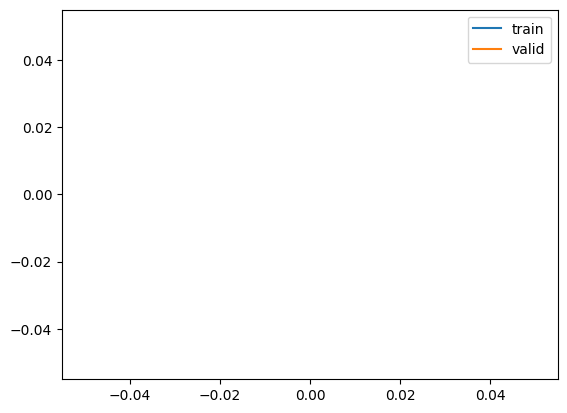

In [18]:
learn18.recorder.plot_loss()

In [19]:
Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [20]:
learn.fine_tune??

Object `learn.fine_tune` not found.


### Any Improvement with batch transforms?

In [21]:
# dls = ImageDataLoaders.from_folder(path)
# learn = vision_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
# learn.fit_one_cycle(1, 0.1)

In [22]:
from fastai.callback.fp16 import *
learn50 = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 57.2MB/s]


SuggestedLRs(valley=0.0020892962347716093)

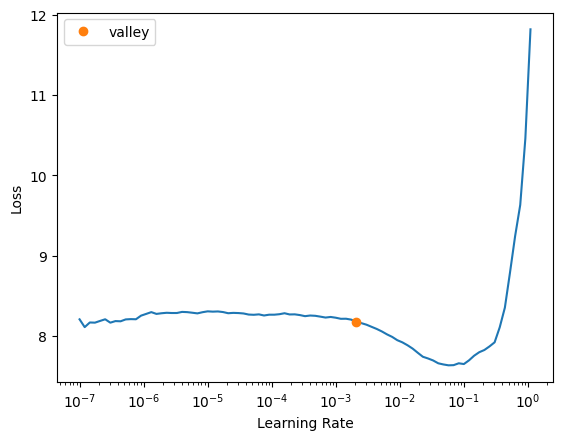

In [23]:
learn50.lr_find()

In [24]:
learn50.fine_tune(6, base_lr=0.003, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,2.733506,1.751920,0.393670,03:01
1,1.585060,0.974423,0.249152,03:00
2,1.208803,0.712429,0.186238,03:00


epoch,train_loss,valid_loss,error_rate,time
0,0.553811,0.372841,0.093898,03:37
1,0.547726,0.340562,0.084386,03:38
2,0.393515,0.282085,0.070090,03:38
3,0.266500,0.241214,0.057351,03:36
4,0.180434,0.222283,0.051177,03:36
5,0.125017,0.214012,0.047839,03:37


In [25]:
result1 = learn50.predict('/kaggle/input/100-bird-species/test/ABBOTTS BABBLER/1.jpg')

In [26]:
result1[0]

'ABBOTTS BABBLER'

In [27]:
result2 = learn50.predict('/kaggle/input/100-bird-species/test/ABYSSINIAN GROUND HORNBILL/1.jpg')

In [28]:
result2[0]

'ABYSSINIAN GROUND HORNBILL'

In [29]:
result3 = learn50.predict('/kaggle/input/100-bird-species/test/ALEXANDRINE PARAKEET/1.jpg')

In [30]:
result3[0]

'ALEXANDRINE PARAKEET'

In [31]:
learn50.export()

In [32]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [33]:
learn_inf = load_learner(path/'export.pkl')

In [34]:
result4 = learn_inf.predict('/kaggle/input/100-bird-species/test/ABYSSINIAN GROUND HORNBILL/1.jpg')

In [35]:
result4[0]

'ABYSSINIAN GROUND HORNBILL'

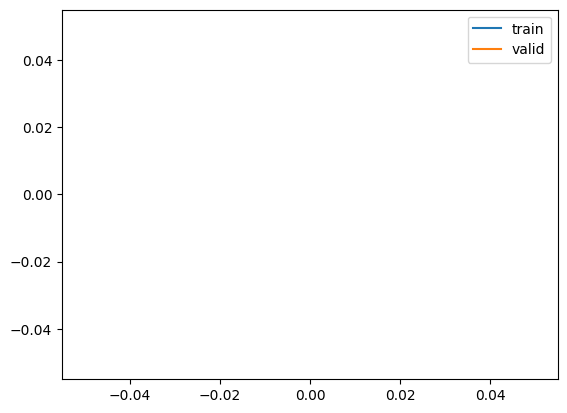

In [36]:
learn50.recorder.plot_loss()

### Progressive resizing

### 

In [37]:
birds = DataBlock(
                    blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    # splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=Resize(200),
                    batch_tfms = aug_transforms(size=180, min_scale=0.75) # aug_transforms(size=224, min_scale=0.75)
)

In [38]:
path = Path("/kaggle/input/100-bird-species")

In [39]:
dls = birds.dataloaders(path)

In [40]:
learn50.dls = dls

SuggestedLRs(valley=0.00013182566908653826)

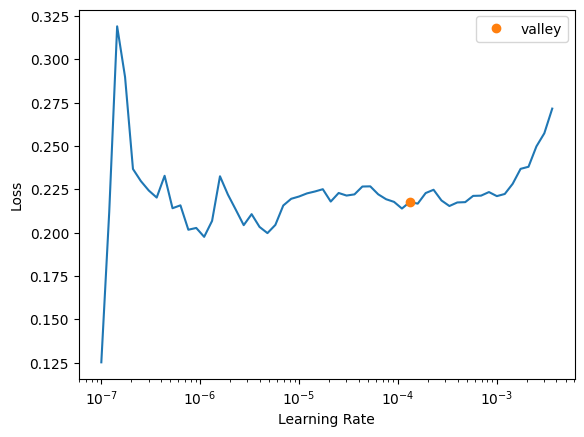

In [41]:
learn50.lr_find()

In [42]:
learn50.unfreeze()

SuggestedLRs(valley=0.00010964782268274575)

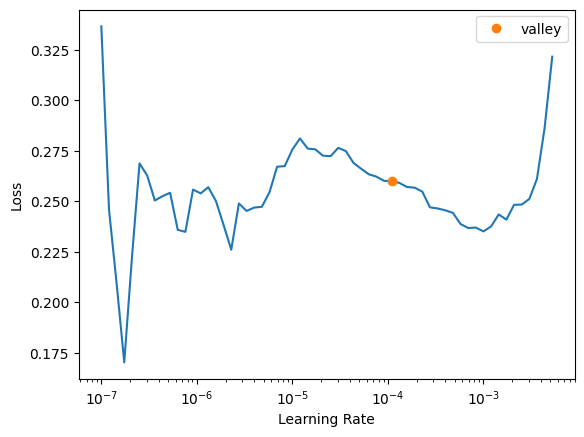

In [43]:
learn50.lr_find()

In [44]:
learn50.fine_tune(3, base_lr=0.0000003)

epoch,train_loss,valid_loss,error_rate,time
0,0.232023,0.094295,0.023308,04:17


epoch,train_loss,valid_loss,error_rate,time
0,0.259477,0.099384,0.024198,05:16
1,0.242025,0.088929,0.021861,05:15
2,0.245925,0.093838,0.023085,05:14


In [45]:
learn50.export()

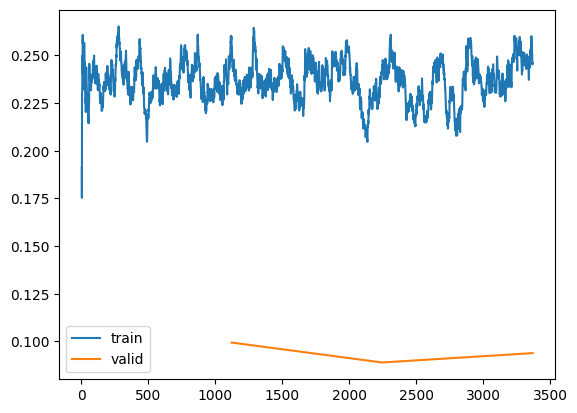

In [46]:
learn50.recorder.plot_loss()

In [47]:
result6 = learn50.predict('/kaggle/input/100-bird-species/test/ABBOTTS BABBLER/1.jpg')

In [48]:
result6[0]

'ABBOTTS BABBLER'

In [49]:
learn50.predict('/kaggle/input/100-bird-species/test/ABBOTTS BABBLER/1.jpg')

('ABBOTTS BABBLER',
 tensor(0),
 tensor([9.9346e-01, 5.1867e-11, 3.2340e-09, 9.2116e-10, 3.0076e-08, 9.9645e-07,
         2.6241e-09, 3.4895e-10, 4.8447e-10, 2.5784e-09, 8.1487e-07, 1.3736e-08,
         5.7187e-11, 1.0241e-06, 4.4887e-11, 6.6109e-08, 6.9951e-09, 9.4406e-09,
         1.6041e-09, 1.9381e-11, 1.2468e-09, 6.0275e-12, 7.7732e-09, 2.3016e-11,
         2.6237e-10, 8.2274e-08, 1.3935e-10, 3.9010e-09, 9.7293e-10, 1.3287e-08,
         3.4452e-08, 1.9049e-09, 4.5198e-04, 1.9387e-09, 6.9339e-09, 1.1996e-06,
         1.2385e-08, 1.1759e-09, 1.3968e-07, 8.6814e-08, 2.7945e-08, 3.7821e-07,
         1.5158e-09, 1.1353e-09, 2.3438e-07, 3.1712e-08, 3.6515e-07, 4.5992e-05,
         2.1133e-07, 2.0853e-08, 9.3366e-08, 6.8321e-10, 3.0555e-10, 1.4494e-08,
         6.5477e-07, 4.5710e-07, 8.2733e-10, 6.9710e-06, 5.0909e-05, 2.9112e-07,
         6.6077e-08, 8.0975e-10, 6.7525e-10, 2.6344e-09, 1.1197e-10, 1.7285e-06,
         1.5067e-10, 4.0479e-10, 2.2847e-08, 4.2160e-08, 2.2241e-08, 1.5976e-

In [50]:
learn50.predict('/kaggle/input/100-bird-species/test/AMERICAN FLAMINGO/1.jpg')[0]

'AMERICAN FLAMINGO'

### Evaluate on test set

In [51]:
testpath = Path('/kaggle/input/100-bird-species/test')

In [52]:
tst_files = get_image_files(testpath)
print(len(tst_files))

2625


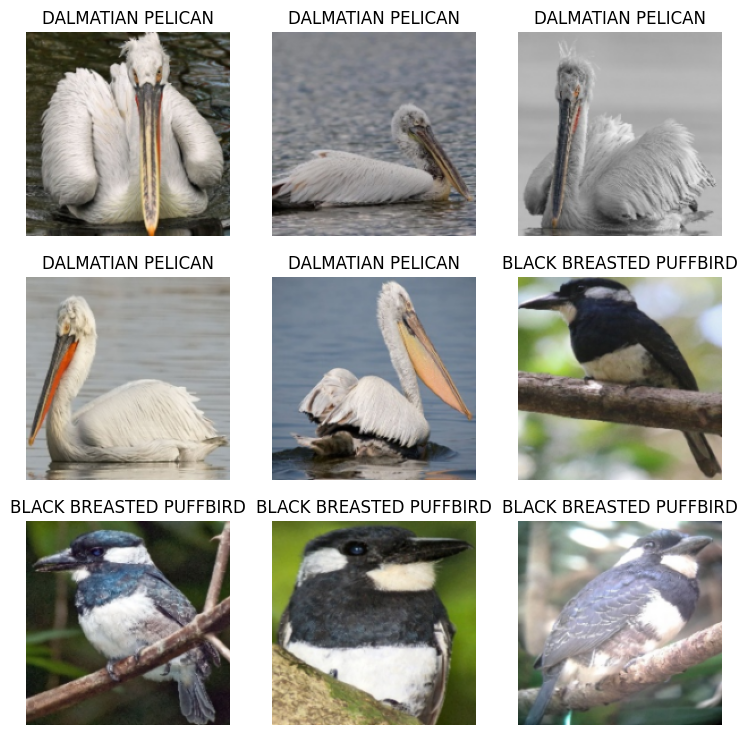

In [53]:
tst_dl = dls.test_dl(tst_files, with_labels=True)
tst_dl.show_batch(max_n=9)

In [54]:
preds, y = learn50.get_preds(dl=tst_dl)
acc = accuracy(preds, y)

In [55]:
print(acc)

TensorBase(0.9939)


In [56]:
acc2 = learn50.validate(dl=tst_dl)

In [57]:
print(acc2)

[0.027416985481977463, 0.006095238029956818]
